In [12]:
# !pip install scikit-plot

In [10]:
import sklearn
import pandas as pd
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans, MiniBatchKMeans, SpectralClustering
from sklearn.decomposition.pca import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Кластеризация обращения граждан по категориям

In [ ]:
# Для задачи кластеризации будут испоьзованы седующие алгоритмы:
# KMeans - 
# MiniBatchKMeans - 
# SpectralClustering - 
# Так как задачи кластеризации вычислительно сложны и ресурсоемки, будем использовать алгоритмы понижения размерности
# Обоснование
# 
# 
# 

In [4]:
# Загружаем данные
try:
    df = pd.read_csv('../Session2/category.csv')
except Exception as ex:
    print(ex)

In [7]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,491,492,493,494,495,496,497,498,499,category
0,0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,благоустройство территории
1,1,0.0,0.236492,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,благоустройство территории
2,2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,содержание и ремонт муниципальных дорог
3,3,0.0,0.000000,0.0,0.0,0.0,0.303421,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,благоустройство территории
4,4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,содержание и ремонт муниципальных дорог


In [ ]:
# Делим исходный набор на тестовую и тренировочную

In [5]:
train_x, test_x, train_y, test_y = train_test_split(df.iloc[:, 1:-1], df.category, test_size=0.33)

In [137]:
train_x.shape, train_y.shape

((14064, 500), (14064,))

In [12]:
# Обучим модель понижения размерности PCA для преобразования признаков из исходной размерности в меньшее. Это поможет повысить скорость обучения моделей почти не изменяя точность

<AxesSubplot:title={'center':'PCA Component Explained Variances'}, xlabel='First n principal components', ylabel='Explained variance ratio of first n components'>

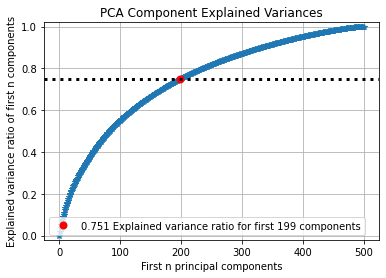

In [6]:
pca = PCA(random_state=2022)
pca.fit(train_x)
skplt.decomposition.plot_pca_component_variance(pca)

In [ ]:
# Визуализируем категории обращения граждан

<AxesSubplot:title={'center':'PCA 2-D Projection'}, xlabel='First Principal Component', ylabel='Second Principal Component'>

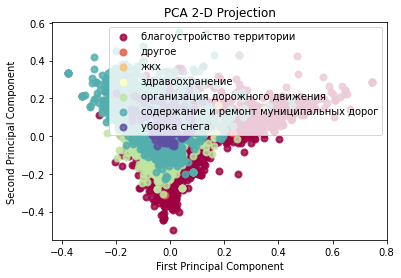

In [41]:
skplt.decomposition.plot_pca_2d_projection(pca, train_x, train_y)

In [ ]:
# Обучим первую модель KMeans

In [60]:
kmeans = KMeans(n_clusters=len(pd.unique(df.category)), random_state=True)
kmeans.fit(pca.transform(train_x), train_y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=True, tol=0.0001, verbose=0)

In [ ]:
# Предскажем обращения пользователей

In [88]:
def pred(index):
    print(kmeans.predict(pca.transform([df.iloc[index, 1:-1].values])), df.iloc[index, -1])

In [89]:
pred(4)
pred(19799)
pred(405)
pred(5)

[2] содержание и ремонт муниципальных дорог
[2] уборка снега
[0] организация дорожного движения
[1] благоустройство территории


In [ ]:
# Выведем результат работы алгоритма, измерив ее с помощью соответствующих метрик

In [90]:
def print_metrics(x, y):
    # Первая метрика
    print('homogeneity_completeness_v_measure:', 
          metrics.homogeneity_completeness_v_measure(kmeans.predict(x), y))
    # Вторая метрика
    print('adjusted_rand_score:', 
          metrics.adjusted_rand_score(kmeans.predict(x), y))

print_metrics(pca.transform(train_x), train_y)

homogeneity_completeness_v_measure: (0.15953898433381364, 0.18698372718690948, 0.17217453823696308)
adjusted_rand_score: 0.002297460178550251


In [91]:
print_metrics(pca.transform(test_x), test_y)

homogeneity_completeness_v_measure: (0.16609096147717148, 0.19237411768168688, 0.1782689808672501)
adjusted_rand_score: 0.0052255953962781175


In [154]:
# Визуализируем на двумерной плоскости целевые значения и предсказанные на обученном наборе, видно, что алгоритмы работают не совсем хорошо

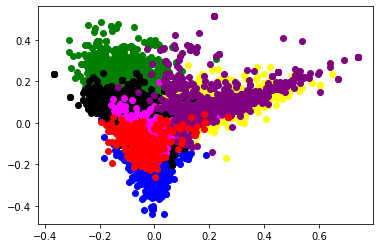

In [161]:
pca1 = PCA(n_components=2)
pca1.fit(train_x)
vis = pd.concat([pd.DataFrame(pca1.transform(train_x)), pd.DataFrame(kmeans.predict(pca.transform(train_x)), columns=['t'])], axis=1)

plt.scatter(vis[vis['t']==2].iloc[:, [0]], vis[vis['t']==2].iloc[:, [1]], c='green')
plt.scatter(vis[vis['t']==3].iloc[:, [0]], vis[vis['t']==3].iloc[:, [1]], c='yellow')
plt.scatter(vis[vis['t']==4].iloc[:, [0]], vis[vis['t']==4].iloc[:, [1]], c='blue')
plt.scatter(vis[vis['t']==1].iloc[:, [0]], vis[vis['t']==1].iloc[:, [1]], c='black')
plt.scatter(vis[vis['t']==6].iloc[:, [0]], vis[vis['t']==6].iloc[:, [1]], c='magenta')
plt.scatter(vis[vis['t']==5].iloc[:, [0]], vis[vis['t']==5].iloc[:, [1]], c='purple')
plt.scatter(vis[vis['t']==0].iloc[:, [0]], vis[vis['t']==0].iloc[:, [1]], c='red')

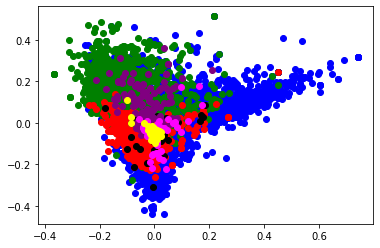

In [166]:
vis = pd.concat([pd.DataFrame(pca1.transform(train_x)), pd.DataFrame(train_y.values, columns=['t'])], axis=1)
l = vis['t'].value_counts().index.tolist()

plt.scatter(vis[vis['t']==l[0]].iloc[:, [0]], vis[vis['t']==l[0]].iloc[:, [1]], c='blue')
plt.scatter(vis[vis['t']==l[1]].iloc[:, [0]], vis[vis['t']==l[1]].iloc[:, [1]], c='green')
plt.scatter(vis[vis['t']==l[2]].iloc[:, [0]], vis[vis['t']==l[2]].iloc[:, [1]], c='red')
plt.scatter(vis[vis['t']==l[4]].iloc[:, [0]], vis[vis['t']==l[4]].iloc[:, [1]], c='black')
plt.scatter(vis[vis['t']==l[5]].iloc[:, [0]], vis[vis['t']==l[5]].iloc[:, [1]], c='purple')
plt.scatter(vis[vis['t']==l[6]].iloc[:, [0]], vis[vis['t']==l[6]].iloc[:, [1]], c='magenta')
plt.scatter(vis[vis['t']==l[3]].iloc[:, [0]], vis[vis['t']==l[3]].iloc[:, [1]], c='yellow')

In [ ]:
# Обучим следующие алгоритмы кластеризации и отобразим их точность: 1)SpectralClustering 2)MiniBatchKMeans

In [8]:
def pred(model, index):
    print(model.fit_predict(pca.transform([df.iloc[index, 1:-1].values])), df.iloc[index, -1])

    
def print_metrics(model, x, y):
    print('homogeneity_completeness_v_measure:', 
          metrics.homogeneity_completeness_v_measure(model.fit_predict(pca.transform(x)), y))
    print('adjusted_rand_score:', 
          metrics.adjusted_rand_score(model.fit_predict(pca.transform(x)), y))



sprctral = SpectralClustering(n_clusters=len(pd.unique(df.category)))
sprctral.fit(pca.transform(train_x), train_y)
# pred(sprctral, 4)
# pred(sprctral, 19799)
# pred(sprctral, 405)
# pred(sprctral, 5)
print_metrics(sprctral, train_x, train_y)
print_metrics(sprctral, test_x, test_y)

homogeneity_completeness_v_measure: (0.1266040868076887, 0.18812679396171675, 0.15135229752705365)
adjusted_rand_score: 0.03420191088248125
homogeneity_completeness_v_measure: (0.1780307231866341, 0.2537349450516091, 0.20924598266267488)
adjusted_rand_score: 0.10390011896741908


In [11]:
def pred(model, index):
    print(model.predict(pca.transform([df.iloc[index, 1:-1].values])), df.iloc[index, -1])

    
def print_metrics(model, x, y):
    print('homogeneity_completeness_v_measure:', 
          metrics.homogeneity_completeness_v_measure(model.predict(pca.transform(x)), y))
    print('adjusted_rand_score:', 
          metrics.adjusted_rand_score(model.predict(pca.transform(x)), y))
    
    

shift = MiniBatchKMeans(n_clusters=len(pd.unique(df.category)))
shift.fit(pca.transform(train_x), train_y)
print_metrics(shift, train_x, train_y)
print_metrics(shift, test_x, test_y)

homogeneity_completeness_v_measure: (0.10229389683427291, 0.09862717946734861, 0.10042708019683105)
adjusted_rand_score: 0.07408855359661413
homogeneity_completeness_v_measure: (0.10270207489358729, 0.09745382348492249, 0.10000914246641611)
adjusted_rand_score: 0.06209278057107985


In [ ]:
# Лучше всех себя показала SpectralClustering

# Классификация обращений граждан по категориям

# Классификация обращений по ведомствам

# Семантический анализ обращений